In [ ]:
# importing necessary liraries to handle my data.
import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO

In [ ]:
# github_csv_url = "https://raw.githubusercontent.com/calebade/Hamoye_internship/main/Neural_craft_team/Subnational%20African%20Data_Aug.19.2013.csv"

# response = requests.get(github_csv_url)
# csv_data = response.text
# df = pd.read_csv(StringIO(csv_data))


In [ ]:
github_url = "https://raw.githubusercontent.com/calebade/Hamoye_internship/main/Neural_craft_team/Subnational%20African%20Data_Aug.19.2013.xls"

response = requests.get(github_url)
data = response.content
df = pd.read_excel(BytesIO(data))


# Data cleaning and Exploration Phase

I used the excel file instead of the csv since the columns are properly labeled for the excel file

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Country name,ISO code,ISO numeric code,Subnational region name,CCAPS subnational region ID,Year,Data Source,Website,Net primary attendance rate (%),Primary NAR standard error,Primary NAR sample size,Gross primary attendance rate (%),Primary GAR standard error,Primary GAR sample size,Net secondary attendance rate (%),Secondary NAR standard error,Secondar NAR sample size,Gross secondary attendance rate (%),Secondary GAR standard error,Secondary GAR sample size,Literacy rate (15 & over),Literacy rate (15 & over) standard error,Literacy rate (15 & over) size,Literacy rate (15-24),Literacy rate (15-24) standard error,Literacy rate (15-24) size,Literacy rate (15-19),Literacy rate (15-19) standard error,Literacy rate (15-19) size,Literacy rate (25-49),Literacy rate (25-49) standard error,Literacy rate (25-49) size,Access to improved water (% of population),Improved Water (% of pop) standard error,Improved Water (% of pop) sample size,Access to improved sanitation (% of population),Improved Sanitation (% of pop) standard error,Improved Sanitation (% of pop) sample size,Electricity in household (% of population),Electricity (% of pop) standard error,Electricity (% of pop) sample size,Radio in household (% of population),Radio (% of pop) standard error,Radio (% of pop) sample size,Television in household (% of population),Television (% of pop) standard error,Television (% of pop) sample size,Radio and/or Television in household (% of population),Radio and/or TV (% of pop) standard error,Radio and/or TV (% of pop) sample size,Access to improved water (% of households),Improved Water (% of hh) standard error,Improved Water (% of hh) sample size,Access to improved sanitation (% of households),Improved Sanitation (% of hh) standard error,Improved Sanitation (% of hh) sample size,Electricity in household (% of households),Electricity (% of hh) standard error,Electricity (% of hh) sample size,Radio in household (% of households),Radio (% of hh) standard error,Radio (% of hh) sample size,Television in household (% of households),Television (% of hh) standard error,Television (% of hh) sample size,Radio and/or television in household (% of households),Radio and/or TV (% of hh) standard error,Radio and/or TV (% of hh) sample size
0,Burundi,BDI,108,Bubanza,108002,2011,DHS,www.measuredhs.com,62.212669,1.541257,1494.0,102.472580,3.636928,1494.0,7.844529,0.965101,817.0,28.771719,2.819628,818.0,57.797642,2.044328,2144.0,68.016655,2.748220,878.0,76.789223,2.812953,487.0,50.576019,2.023862,1204.0,64.524750,4.098234,7248.0,42.428234,5.014913,7248.0,2.635628,0.943304,7248.0,55.748539,2.021995,7248.0,1.855816,0.639537,7248.0,55.494587,2.013759,7248.0,64.727745,4.048388,1441.0,41.207016,4.939431,1441.0,2.563438,0.932698,1441.0,50.203342,1.984068,1441.0,1.656027,0.644799,1441.0,49.767658,1.906297,1441.0
1,Burundi,BDI,108,Bujumbura Mairie,108003,2011,DHS,www.measuredhs.com,75.802948,1.635965,718.0,112.636269,4.013371,719.0,31.958845,2.921502,563.0,95.412285,6.530486,563.0,88.665176,1.183123,2002.0,88.634804,1.151576,992.0,86.679359,1.827134,513.0,88.821198,1.796425,942.0,90.069534,2.291323,4752.0,86.296799,4.456155,4752.0,62.607437,6.168787,4752.0,80.243233,2.606479,4752.0,53.190296,5.902191,4752.0,81.972755,2.609640,4752.0,88.540581,2.479091,912.0,85.660011,4.584234,912.0,57.100666,6.255036,912.0,75.303909,2.757758,912.0,44.327900,5.504890,912.0,77.148560,2.845784,912.0
2,Burundi,BDI,108,Bujumbura Rural,108004,2011,DHS,www.measuredhs.com,62.212669,1.541257,1494.0,102.472580,3.636928,1494.0,7.844529,0.965101,817.0,28.771719,2.819628,818.0,57.797642,2.044328,2144.0,68.016655,2.748220,878.0,76.789223,2.812953,487.0,50.576019,2.023862,1204.0,64.524750,4.098234,7248.0,42.428234,5.014913,7248.0,2.635628,0.943304,7248.0,55.748539,2.021995,7248.0,1.855816,0.639537,7248.0,55.494587,2.013759,7248.0,64.727745,4.048388,1441.0,41.207016,4.939431,1441.0,2.563438,0.932698,1441.0,50.203342,1.984068,1441.0,1.656027,0.644799,1441.0,49.767658,1.906297,1441.0
3,Burundi,BDI,10

## Exploratory Data Analysis

In [ ]:
df.shape

(471, 68)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 68 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Country name                                            471 non-null    object 
 1   ISO code                                                471 non-null    object 
 2   ISO numeric code                                        471 non-null    int64  
 3   Subnational region name                                 471 non-null    object 
 4   CCAPS subnational region ID                             471 non-null    int64  
 5   Year                                                    471 non-null    int64  
 6   Data Source                                             471 non-null    object 
 7   Website                                                 471 non-null    object 
 8   Net primary attendance rate (%)         

In [ ]:
pd.set_option('display.max_rows', None)
null_values = df.isnull().sum()

print("Columns with Null Values:")
print(null_values)

Columns with Null Values:
Country name                                                0
ISO code                                                    0
ISO numeric code                                            0
Subnational region name                                     0
CCAPS subnational region ID                                 0
Year                                                        0
Data Source                                                 0
Website                                                     0
Net primary attendance rate (%)                             1
Primary NAR standard error                                  1
Primary NAR sample size                                     1
Gross primary attendance rate (%)                           1
Primary GAR standard error                                  1
Primary GAR sample size                                     1
Net secondary attendance rate (%)                           1
Secondary NAR standard error                

i feel the columns with about 10 and below missing values can be replaced with the mean but a better method has to be used for the ones as high as 124

In [ ]:
df.describe()

,ISO numeric code,CCAPS subnational region ID,Year,Net primary attendance rate (%),Primary NAR standard error,Primary NAR sample size,Gross primary attendance rate (%),Primary GAR standard error,Primary GAR sample size,Net secondary attendance rate (%),Secondary NAR standard error,Secondar NAR sample size,Gross secondary attendance rate (%),Secondary GAR standard error,Secondary GAR sample size,Literacy rate (15 & over),Literacy rate (15 & over) standard error,Literacy rate (15 & over) size,Literacy rate (15-24),Literacy rate (15-24) standard error,Literacy rate (15-24) size,Literacy rate (15-19),Literacy rate (15-19) standard error,Literacy rate (15-19) size,Literacy rate (25-49),Literacy rate (25-49) standard error,Literacy rate (25-49) size,Access to improved water (% of population),Improved Water (% of pop) standard error,Improved Water (% of pop) sample size,Access to improved sanitation (% of population),Improved Sanitation (% of pop) standard error,Improved Sanitation (% of pop) sample size,Electricity in household (% of population),Electricity (% of pop) standard error,Electricity (% of pop) sample size,Radio in household (% of population),Radio (% of pop) standard error,Radio (% of pop) sample size,Television in household (% of population),Television (% of pop) standard error,Television (% of pop) sample size,Radio and/or Television in household (% of population),Radio and/or TV (% of pop) standard error,Radio and/or TV (% of pop) sample size,Access to improved water (% of households),Improved Water (% of hh) standard error,Improved Water (% of hh) sample size,Access to improved sanitation (% of households),Improved Sanitation (% of hh) standard error,Improved Sanitation (% of hh) sample size,Electricity in household (% of households),Electricity (% of hh) standard error,Electricity (% of hh) sample size,Radio in household (% of households),Radio (% of hh) standard error,Radio (% of hh) sample size,Television in household (% of households),Television (% of hh) standard error,Television (% of hh) sample size,Radio and/or television in household (% of households),Radio and/or TV (% of hh) standard error,Radio and/or TV (% of hh) sample size
count,471.000000,471.000000,471.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,449.000000,449.000000,449.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,449.000000,449.000000,449.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,497.152866,497161.866242,2008.131635,69.950883,2.544909,971.844681,102.799593,4.359389,1035.585106,29.586993,2.813817,671.478723,46.098336,4.296504,711.746809,61.434973,2.627702,1806.498559,67.072803,2.989891,852.760807,71.134001,3.523134,374.775216,57.286808,2.787651,1023.190202,60.442817,4.163505,5306.778723,40.165780,2.955834,5302.602128,28.916043,2.885390,5296.064588,62.570418,2.661125,5354.130152,25.859050,2.462269,5353.002169,66.361430,2.578027,5358.386117,60.583051,4.013583,1072.791489,39.920602,2.838389,1071.255319,28.546700,2.764106,1027.467706,59.583969,2.482746,1039.026030,24.049675,2.227461,1038.809111,63.282087,2.438457,1039.780911
std,240.493840,240494.277329,2.053455,21.433693,1.352500,936.529013,31.096263,1.942204,940.250504,20.701757,1.415996,457.832059,28.878346,2.183945,481.824506,25.397349,1.517131,1507.064101,24.195768,1.717665,732.352751,22.232864,2.063453,301.652187,27.039922,1.542747,790.544181,24.733905,2.741863,3981.937583,29.219446,1.995369,3981.623067,30.222012,2.477114,4027.472117,16.507053,1.198700,4003.160271,27.005865,1.836991,4002.051709,18.480074,1.351008,4005

In [ ]:
df['Year'].unique()

array([2011, 2006, 2010, 2005, 2008, 2009, 2007, 2003])

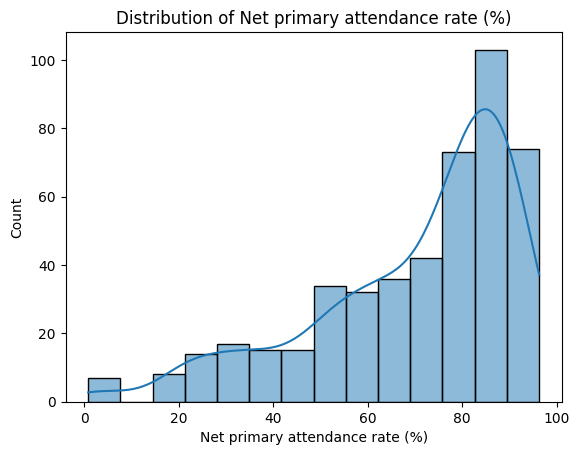

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Net primary attendance rate (%)'], kde=True)
plt.title('Distribution of Net primary attendance rate (%)')
plt.show()



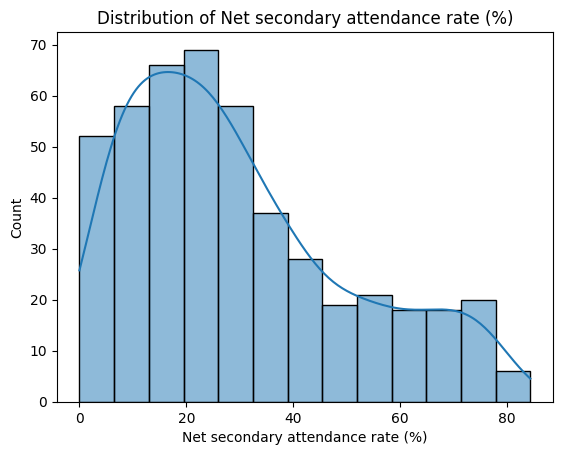

In [ ]:
sns.histplot(df['Net secondary attendance rate (%)'], kde=True)
plt.title('Distribution of Net secondary attendance rate (%)')
plt.show()

#from the graph below, tracing count to the %, about 69 regions have 20 attendance rate

Check for the distribution for other columns by copying the column name from the table and replacing the one in the code with it.

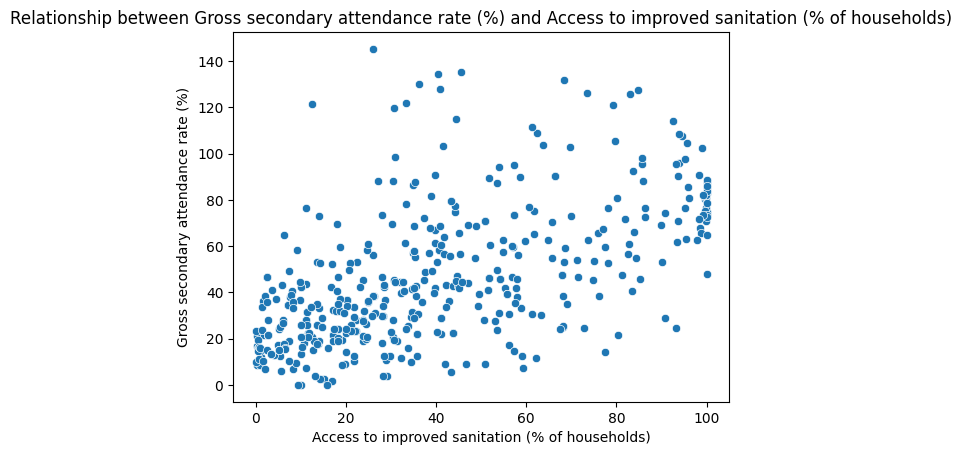

In [ ]:
sns.scatterplot(x='Access to improved sanitation (% of households)', y='Gross secondary attendance rate (%)', data=df)
plt.title('Relationship between Gross secondary attendance rate (%) and Access to improved sanitation (% of households)')
plt.show()

you can change X and Y in the code for any two variables you want to check for

<ipython-input-13-b891dc6e5b23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


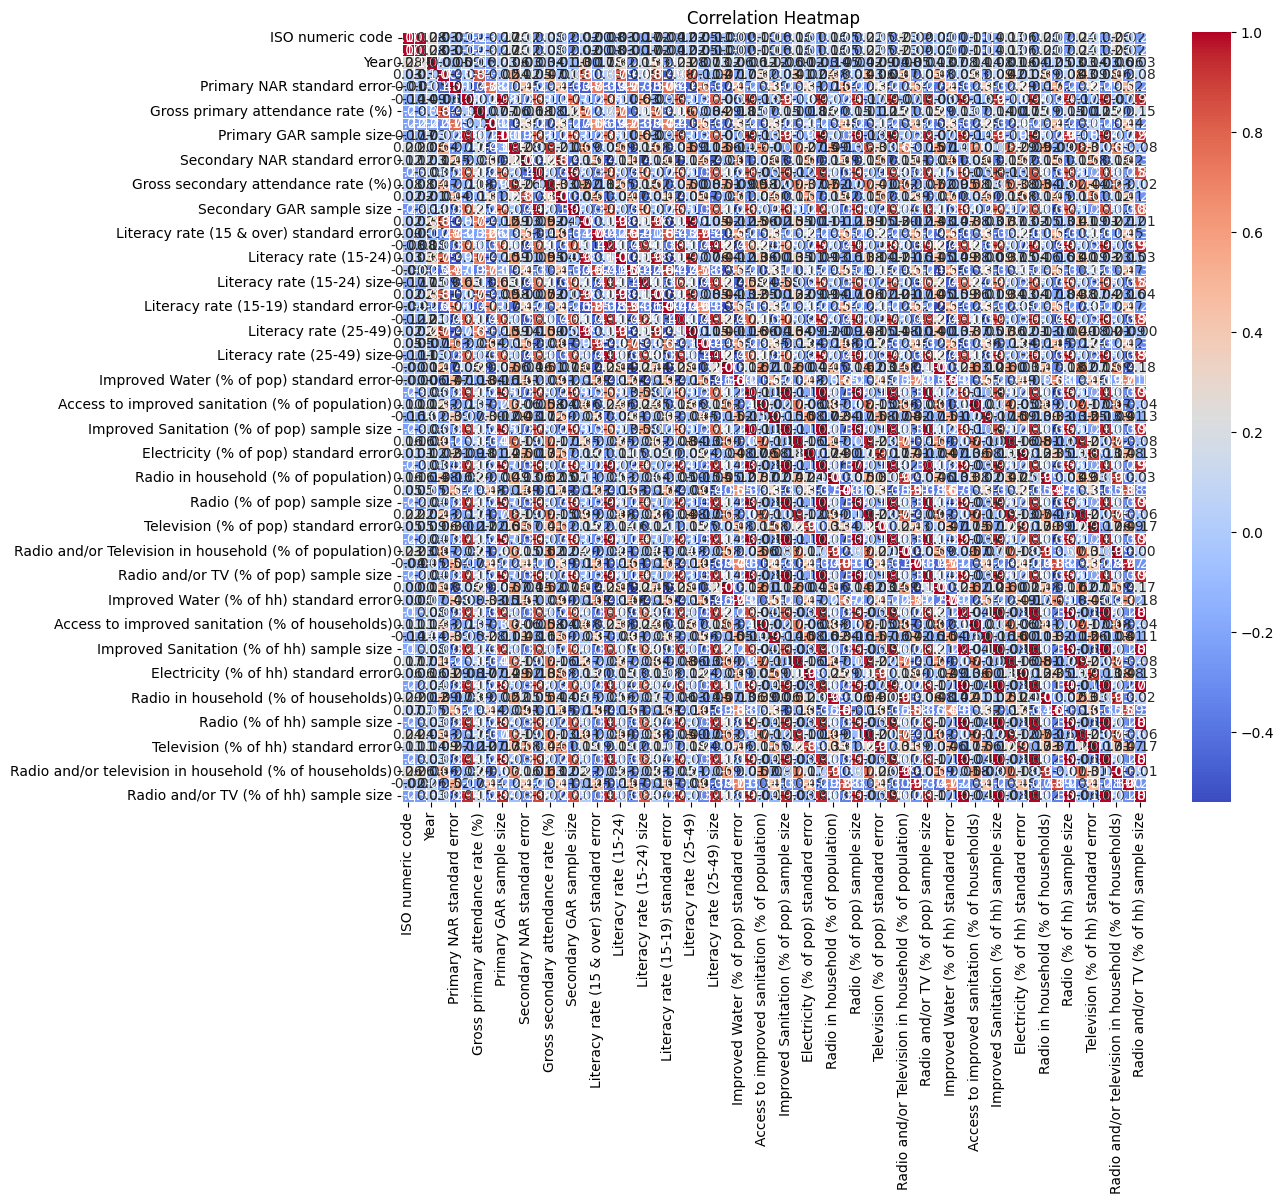

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Nah! too much columns for it to make sense

## correcting missing values

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

# Columns with missing values up to 10
columns_to_impute_mean = df.columns[df.isnull().sum() <= 10]

# Impute missing values with the mean for numerical columns, and most frequent for categorical columns
for col in columns_to_impute_mean:
    if df[col].dtype == 'object':
        imputer = SimpleImputer(strategy='most_frequent')
    else:
        imputer = SimpleImputer(strategy='mean')
    df[col] = imputer.fit_transform(df[[col]])

# Columns with missing values from 11 to 23
columns_to_impute_predictive = df.columns[(df.isnull().sum() > 10) & (df.isnull().sum() <= 23)]

# Impute missing values using KNN imputation for these columns
# this is kind of creating a simple model to predict the missing values
if not columns_to_impute_predictive.empty:
    knn_imputer = KNNImputer(n_neighbors=5)
    df[columns_to_impute_predictive] = knn_imputer.fit_transform(df[columns_to_impute_predictive])

# Remove columns with missing values above 23
columns_to_remove = df.columns[df.isnull().sum() > 23]
df.drop(columns=columns_to_remove, inplace=True)



**K-Nearest Neighbors (KNN)** imputation is a technique used to fill missing values in a dataset based on the values of its nearest neighbors. Here's how KNN imputation works:

**1. Select a Distance Metric:** The first step is to choose a distance metric to measure the similarity between data points. Common distance metrics include Euclidean distance, Manhattan distance, or Minkowski distance. The choice of distance metric depends on the nature of your data and the problem you are trying to solve.

**2. Identify Neighbors:** For each data point with missing values, KNN identifies its k-nearest neighbors from the dataset based on the chosen distance metric. These neighbors are the data points that are most similar to the one with missing values.

**3. Calculate Weighted Average:** KNN computes a weighted average of the observed values of the feature in question from the k-nearest neighbors. The weights are typically based on the inverse of the distances; closer neighbors have a higher influence on the imputed value than more distant neighbors.

**4. Fill Missing Values:** The calculated weighted average is used to fill in the missing value for the feature in question in the data point. This process is repeated for each missing value in the dataset.

In [ ]:
pd.set_option('display.max_rows', None)
null_values = df.isnull().sum()

print("Columns with Null Values:")
print(null_values)

Columns with Null Values:
Country name                                              0
ISO code                                                  0
ISO numeric code                                          0
Subnational region name                                   0
CCAPS subnational region ID                               0
Year                                                      0
Data Source                                               0
Website                                                   0
Net primary attendance rate (%)                           0
Primary NAR standard error                                0
Primary NAR sample size                                   0
Gross primary attendance rate (%)                         0
Primary GAR standard error                                0
Primary GAR sample size                                   0
Net secondary attendance rate (%)                         0
Secondary NAR standard error                              0
Secondar NAR s

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No Duplicate Rows found.")

No Duplicate Rows found.


In [ ]:
from google.colab import files

# Assuming df is your cleaned DataFrame
df.to_csv('cleaned_dataset.csv', index=False)

# Download the CSV file into system locally
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## This will download the cleaned data into your laptop

# Futher exploration and plot

In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

<Axes: xlabel='Access to improved sanitation (% of population)', ylabel='Net secondary attendance rate (%)'>

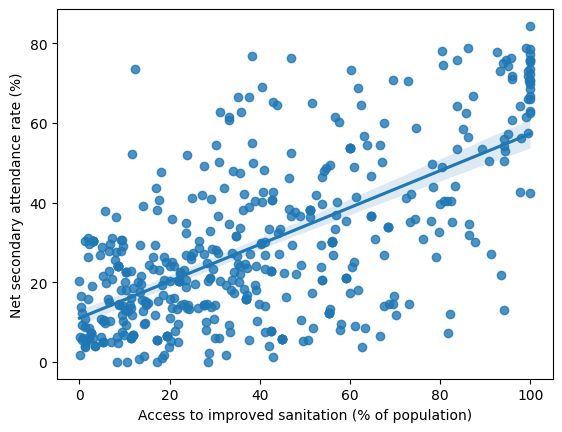

In [ ]:
sns.regplot(x='Access to improved sanitation (% of population)', y='Net secondary attendance rate (%)', data = df)

In [ ]:
features = ['Access to improved water (% of population)', 'Access to improved sanitation (% of population)','Electricity in household (% of population)','Radio and/or television in household (% of households)']

In [ ]:
x= df[features]
y= df['Net secondary attendance rate (%)']

In [ ]:
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)



0.6173912924698326

<Axes: xlabel='Access to improved water (% of population)'>

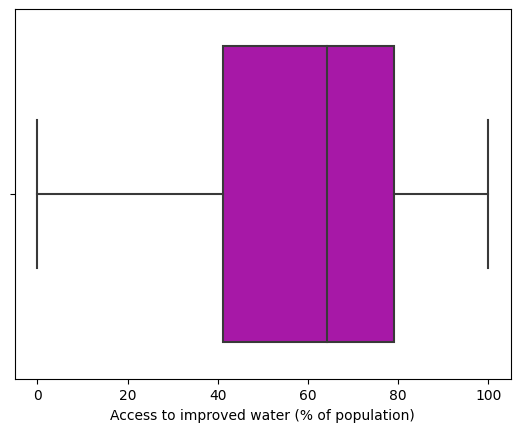

In [ ]:
sns.boxplot(x=df['Access to improved water (% of population)'], palette=["m", "g"], data=df)

Attendance Rates:
Average Net primary attendance rate (%): 69.95
Average Gross primary attendance rate (%): 102.80

Sample Sizes:
Average Primary NAR sample size: 971.84
Average Secondar NAR sample size: 671.48

Standard Errors:
Average Primary NAR standard error: 2.54
Average Secondary NAR standard error: 2.81


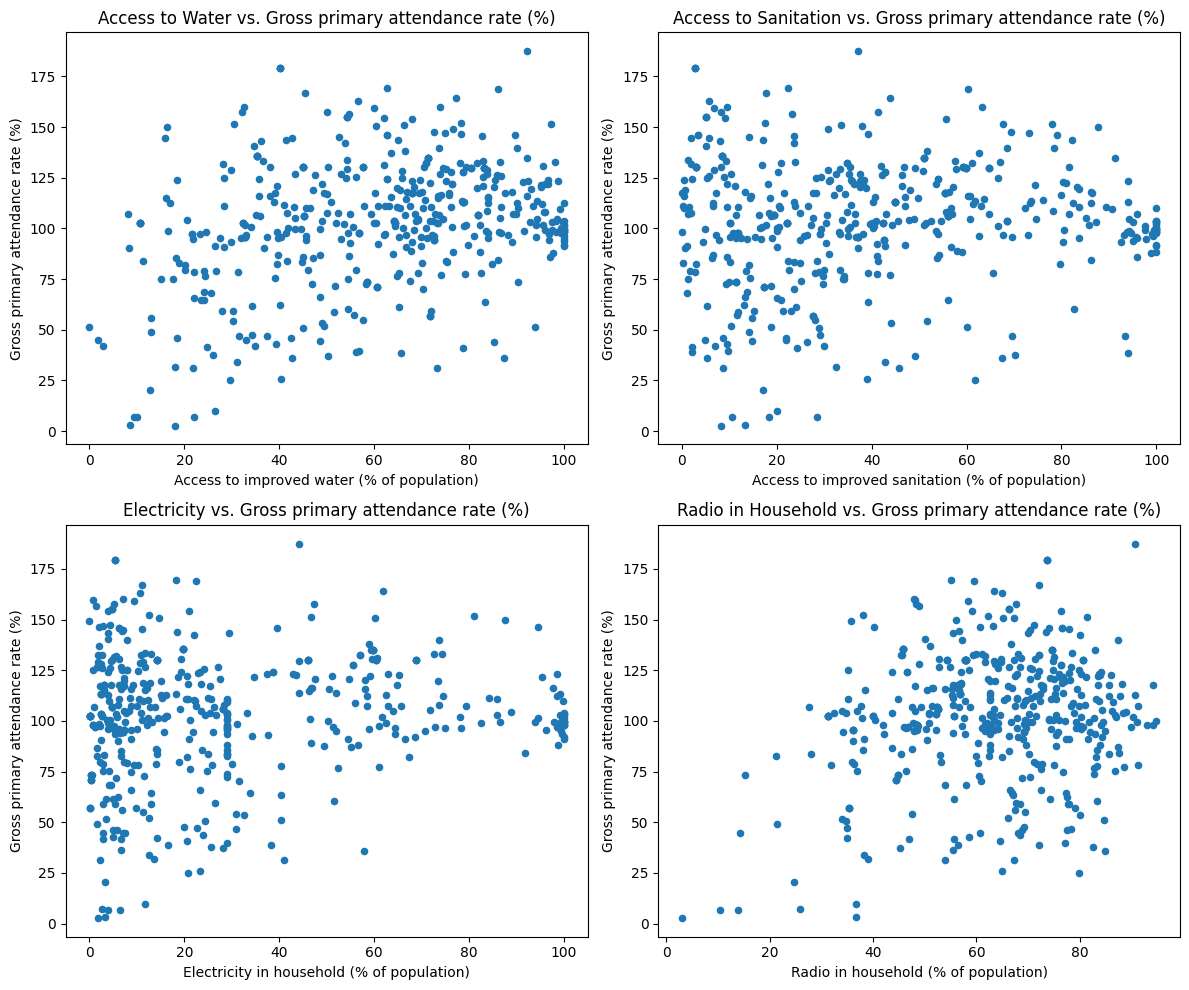

In [ ]:


# List of columns related to educational infrastructure
columns_education = [
    'Net primary attendance rate (%)',
    'Gross primary attendance rate (%)',
    'Access to improved water (% of population)',
    'Access to improved sanitation (% of population)',
    'Electricity in household (% of population)',
    'Radio in household (% of population)',
    'Television in household (% of population)'
]

# Generate insights
# Attendance Rates
print("Attendance Rates:")
for col in ['Net primary attendance rate (%)', 'Gross primary attendance rate (%)']:
    print(f"Average {col}: {df[col].mean():.2f}")

# # Literacy Rates
# print("\nLiteracy Rates:")
# for col in ['Literacy rate (15 & over)', 'Literacy rate (15-24)']:
#     print(f"Average {col}: {df[col].mean():.2f}")

# Sample Sizes
print("\nSample Sizes:")
for col in ['Primary NAR sample size', 'Secondar NAR sample size']:
    print(f"Average {col}: {df[col].mean():.2f}")

# Standard Errors
print("\nStandard Errors:")
for col in ['Primary NAR standard error', 'Secondary NAR standard error']:
    print(f"Average {col}: {df[col].mean():.2f}")

# Impact on Education
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

df.plot.scatter(x='Access to improved water (% of population)', y='Gross primary attendance rate (%)', ax=axes[0])
axes[0].set_title("Access to Water vs. Gross primary attendance rate (%)")

df.plot.scatter(x='Access to improved sanitation (% of population)', y='Gross primary attendance rate (%)', ax=axes[1])
axes[1].set_title("Access to Sanitation vs. Gross primary attendance rate (%)")

df.plot.scatter(x='Electricity in household (% of population)', y='Gross primary attendance rate (%)', ax=axes[2])
axes[2].set_title("Electricity vs. Gross primary attendance rate (%)")

df.plot.scatter(x='Radio in household (% of population)', y='Gross primary attendance rate (%)', ax=axes[3])
axes[3].set_title("Radio in Household vs. Gross primary attendance rate (%)")

plt.tight_layout()
plt.show()


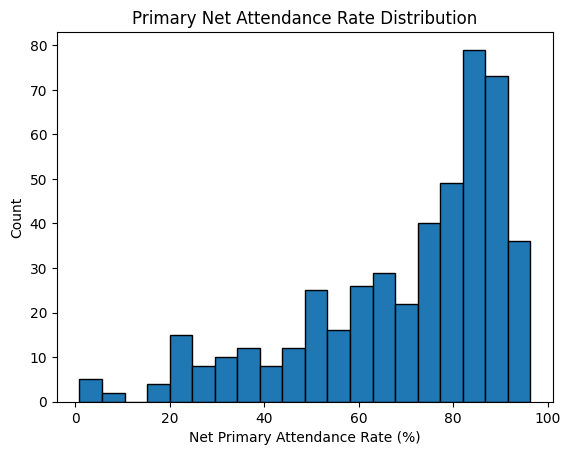

In [ ]:

attendance_columns = [
    'Net primary attendance rate (%)',
    'Gross primary attendance rate (%)',
    'Net secondary attendance rate (%)',
    'Gross secondary attendance rate (%)'
]

attendance_df = df[attendance_columns]

# Calculate summary statistics
summary_stats = attendance_df.describe()

# Identify regions or years with high attendance rates
high_attendance_regions = df.nlargest(10, 'Net primary attendance rate (%)')  # Change column name as needed
low_attendance_regions = df.nsmallest(10, 'Net primary attendance rate (%)')  # Change column name as needed

import matplotlib.pyplot as plt

plt.hist(df['Net primary attendance rate (%)'], bins=20, edgecolor='k')
plt.xlabel('Net Primary Attendance Rate (%)')
plt.ylabel('Count')
plt.title('Primary Net Attendance Rate Distribution')
plt.show()

In [ ]:
high_attendance_regions

,Country name,ISO code,ISO numeric code,Subnational region name,CCAPS subnational region ID,Year,Data Source,Website,Net primary attendance rate (%),Primary NAR standard error,Primary NAR sample size,Gross primary attendance rate (%),Primary GAR standard error,Primary GAR sample size,Net secondary attendance rate (%),Secondary NAR standard error,Secondar NAR sample size,Gross secondary attendance rate (%),Secondary GAR standard error,Secondary GAR sample size,Access to improved water (% of population),Improved Water (% of pop) standard error,Improved Water (% of pop) sample size,Access to improved sanitation (% of population),Improved Sanitation (% of pop) standard error,Improved Sanitation (% of pop) sample size,Electricity in household (% of population),Electricity (% of pop) standard error,Electricity (% of pop) sample size,Radio in household (% of population),Radio (% of pop) standard error,Radio (% of pop) sample size,Television in household (% of population),Television (% of pop) standard error,Television (% of pop) sample size,Radio and/or Television in household (% of population),Radio and/or TV (% of pop) standard error,Radio and/or TV (% of pop) sample size,Access to improved water (% of households),Improved Water (% of hh) standard error,Improved Water (% of hh) sample size,Access to improved sanitation (% of households),Improved Sanitation (% of hh) standard error,Improved Sanitation (% of hh) sample size,Electricity in household (% of households),Electricity (% of hh) standard error,Electricity (% of hh) sample size,Radio in household (% of households),Radio (% of hh) standard error,Radio (% of hh) sample size,Television in household (% of households),Television (% of hh) standard error,Television (% of hh) sample size,Radio and/or television in household (% of households),Radio and/or TV (% of hh) standard error,Radio and/or TV (% of hh) sample size
428,Mauritania,MRT,478.0,Trarza,478013.0,2007.0,MICS,www.unicef.org/statistics/,96.317795,1.042992,396.0,168.945587,5.691159,787.0,23.863319,2.066721,503.0,38.202087,2.898031,707.0,86.049355,1.164071,4283.0,60.357170,1.763697,4283.0,22.436237,1.361145,4276.0,59.624146,1.955781,4286.0,22.220598,1.528691,4277.0,67.206955,1.822530,4286.0,85.975945,0.919767,804.0,58.016277,1.527213,804.0,20.094200,0.957724,804.0,58.841896,1.718211,805.0,19.096943,1.128019,803.0,64.852921,1.646510,805.0
460,Togo,TGO,768.0,Plateaux,768005.0,2006.0,MICS,www.unicef.org/statistics/,95.512596,0.885136,753.0,143.683212,3.522377,983.0,38.066490,2.092045,749.0,46.729321,2.450806,876.0,41.545502,1.469487,5214.0,17.177549,1.222514,5214.0,18.451736,1.210549,5214.0,73.428040,1.460545,5214.0,15.490319,1.389799,5214.0,73.619041,1.458755,5214.0,41.848873,1.110713,1191.0,18.240440,1.027208,1191.0,17.624186,0.914040,1191.0,69.021614,1.361767,1191.0,12.417558,0.968033,1191.0,69.271729,1.359961,1191.0
306,Sao Tome and Principe,STP,678.0,Principe,678001.0,2009.0,DHS,www.measuredhs.com,95.413872,2.045817,323.0,150.556335,4.381925,323.0,27.142071,8.510447,249.0,44.428711,14.922399,249.0,60.365452,14.950254,1846.0,37.869308,7.292931,1846.0,60.230423,9.053837,1846.0,65.126350,7.467397,1846.0,58.279842,11.391050,1846.0,69.868866,7.186094,1846.0,59.886021,14.109353,525.0,32.781990,5.751267,525.0,53.061928,10.221774,525.0,58.049595,8.593001,525.0,48.000629,11.930634,525.0,62.091255,8.784486,525.0
419,Mauritania,MRT,478.0,Dakhlet Nouadhibou,478004.0,2007.0,MICS,www.unicef.org/statistics/,95.342377,0.927063,503.0,146.273727,3.912453,708.0,26.450691,2.208235,565.0,38.267662,2.787140,653.0,89.664665,1.120482,4312.0,79.038170,1.486028,4312.0,94.470634,0.592362,4323.0,60.653431,2.099773,4320.0,86.399338,1.088764,4318.0,93.766632,0.845486,4323.0,87.859390,0.975307,829.0,76.250549,1.226197,829.0,91.660248,0.725402,830.0,63.763523,1.682437,829.0,76.242027,1.381070,829.0,90.716515,0.973863,830.0
424,Mauritania,MRT,478.0,Inchiri,478009.0,2007.0,MICS,www.unicef.org/statistics/,95.267334,2.590615,101.0,164.252121,14.293688,183.0

In [ ]:
low_attendance_regions

,Country name,ISO code,ISO numeric code,Subnational region name,CCAPS subnational region ID,Year,Data Source,Website,Net primary attendance rate (%),Primary NAR standard error,Primary NAR sample size,Gross primary attendance rate (%),Primary GAR standard error,Primary GAR sample size,Net secondary attendance rate (%),Secondary NAR standard error,Secondar NAR sample size,Gross secondary attendance rate (%),Secondary GAR standard error,Secondary GAR sample size,Access to improved water (% of population),Improved Water (% of pop) standard error,Improved Water (% of pop) sample size,Access to improved sanitation (% of population),Improved Sanitation (% of pop) standard error,Improved Sanitation (% of pop) sample size,Electricity in household (% of population),Electricity (% of pop) standard error,Electricity (% of pop) sample size,Radio in household (% of population),Radio (% of pop) standard error,Radio (% of pop) sample size,Television in household (% of population),Television (% of pop) standard error,Television (% of pop) sample size,Radio and/or Television in household (% of population),Radio and/or TV (% of pop) standard error,Radio and/or TV (% of pop) sample size,Access to improved water (% of households),Improved Water (% of hh) standard error,Improved Water (% of hh) sample size,Access to improved sanitation (% of households),Improved Sanitation (% of hh) standard error,Improved Sanitation (% of hh) sample size,Electricity in household (% of households),Electricity (% of hh) standard error,Electricity (% of hh) sample size,Radio in household (% of households),Radio (% of hh) standard error,Radio (% of hh) sample size,Television in household (% of households),Television (% of hh) standard error,Television (% of hh) sample size,Radio and/or television in household (% of households),Radio and/or TV (% of hh) standard error,Radio and/or TV (% of hh) sample size
446,Somalia,SOM,706.0,Jubbada Dhexe,706009.0,2010.0,MICS,www.unicef.org/statistics/,0.883070,0.874960,155.0,2.753213,1.385325,169.0,0.000000,0.000000,42.0,0.000000,0.000000,45.0,18.138351,1.843956,862.0,8.297934,2.102834,862.0,1.789967,1.058223,862.0,2.983278,1.332002,862.0,0.000000,0.000000,862.0,2.983278,1.332002,862.0,18.258350,1.724546,168.0,9.503523,2.288958,168.0,1.919450,1.124550,168.0,3.043058,1.346671,168.0,0.000000,0.000000,168.0,3.043058,1.346671,168.0
445,Somalia,SOM,706.0,Hiiraan,706008.0,2010.0,MICS,www.unicef.org/statistics/,1.255762,0.902903,188.0,6.897810,2.665995,264.0,0.000000,0.000000,68.0,3.971366,2.768960,117.0,9.428889,1.771124,1148.0,28.491983,2.530448,1148.0,3.916058,1.372353,1161.0,13.866801,2.448635,1154.0,0.330184,0.330565,1161.0,14.116861,2.447836,1161.0,9.831812,1.525507,214.0,29.192698,2.192813,214.0,4.346860,1.419100,216.0,14.614330,2.398808,215.0,0.442941,0.442942,216.0,14.992538,2.407587,216.0
443,Somalia,SOM,706.0,Galguduud,706006.0,2010.0,MICS,www.unicef.org/statistics/,1.267357,0.770899,315.0,3.163223,1.067584,329.0,0.806663,0.801426,124.0,2.419990,1.786612,160.0,8.459377,1.454323,1337.0,13.292652,2.172450,1341.0,3.274471,1.301164,1341.0,36.750877,3.541478,1341.0,0.000000,0.000000,1341.0,36.750877,3.541478,1341.0,8.847478,0.946376,215.0,14.278650,1.815056,216.0,3.234594,1.199603,216.0,37.948437,3.189324,216.0,0.000000,0.000000,216.0,37.948437,3.189324,216.0
442,Somalia,SOM,706.0,Bay,706005.0,2010.0,MICS,www.unicef.org/statistics/,3.142123,1.308757,446.0,7.022099,1.738445,473.0,0.873786,0.857396,125.0,2.621357,1.489389,153.0,21.961952,1.651517,2161.0,18.260618,1.568950,2161.0,2.705148,0.986633,2126.0,25.827810,2.058210,2161.0,2.586191,1.056277,2161.0,26.588455,2.017491,2161.0,20.183361,1.211859,408.0,15.093777,1.006000,408.0,2.431695,0.772978,403.0,22.823439,1.742535,408.0,1.620440,0.611728,408.0,23.363586,1.720557,408.0
439,Somalia,SOM,706.0,Bakool,706002.0,2010.0,MICS,www.unicef.org/statistics/,4.533437,1.647754,239.0,6.853268,2.209235,259.0,0.000000,0.000000,65.0,0.000000,0.000000,94.0,10.114438,2.107066,1058.0,10.477052,2.053634

# Modelling and Prediction

In [ ]:
df.head()

,Country name,ISO code,ISO numeric code,Subnational region name,CCAPS subnational region ID,Year,Data Source,Website,Net primary attendance rate (%),Primary NAR standard error,Primary NAR sample size,Gross primary attendance rate (%),Primary GAR standard error,Primary GAR sample size,Net secondary attendance rate (%),Secondary NAR standard error,Secondar NAR sample size,Gross secondary attendance rate (%),Secondary GAR standard error,Secondary GAR sample size,Access to improved water (% of population),Improved Water (% of pop) standard error,Improved Water (% of pop) sample size,Access to improved sanitation (% of population),Improved Sanitation (% of pop) standard error,Improved Sanitation (% of pop) sample size,Electricity in household (% of population),Electricity (% of pop) standard error,Electricity (% of pop) sample size,Radio in household (% of population),Radio (% of pop) standard error,Radio (% of pop) sample size,Television in household (% of population),Television (% of pop) standard error,Television (% of pop) sample size,Radio and/or Television in household (% of population),Radio and/or TV (% of pop) standard error,Radio and/or TV (% of pop) sample size,Access to improved water (% of households),Improved Water (% of hh) standard error,Improved Water (% of hh) sample size,Access to improved sanitation (% of households),Improved Sanitation (% of hh) standard error,Improved Sanitation (% of hh) sample size,Electricity in household (% of households),Electricity (% of hh) standard error,Electricity (% of hh) sample size,Radio in household (% of households),Radio (% of hh) standard error,Radio (% of hh) sample size,Television in household (% of households),Television (% of hh) standard error,Television (% of hh) sample size,Radio and/or television in household (% of households),Radio and/or TV (% of hh) standard error,Radio and/or TV (% of hh) sample size
0,Burundi,BDI,108.0,Bubanza,108002.0,2011.0,DHS,www.measuredhs.com,62.212669,1.541257,1494.0,102.472580,3.636928,1494.0,7.844529,0.965101,817.0,28.771719,2.819628,818.0,64.524750,4.098234,7248.0,42.428234,5.014913,7248.0,2.635628,0.943304,7248.0,55.748539,2.021995,7248.0,1.855816,0.639537,7248.0,55.494587,2.013759,7248.0,64.727745,4.048388,1441.0,41.207016,4.939431,1441.0,2.563438,0.932698,1441.0,50.203342,1.984068,1441.0,1.656027,0.644799,1441.0,49.767658,1.906297,1441.0
1,Burundi,BDI,108.0,Bujumbura Mairie,108003.0,2011.0,DHS,www.measuredhs.com,75.802948,1.635965,718.0,112.636269,4.013371,719.0,31.958845,2.921502,563.0,95.412285,6.530486,563.0,90.069534,2.291323,4752.0,86.296799,4.456155,4752.0,62.607437,6.168787,4752.0,80.243233,2.606479,4752.0,53.190296,5.902191,4752.0,81.972755,2.609640,4752.0,88.540581,2.479091,912.0,85.660011,4.584234,912.0,57.100666,6.255036,912.0,75.303909,2.757758,912.0,44.327900,5.504890,912.0,77.148560,2.845784,912.0
2,Burundi,BDI,108.0,Bujumbura Rural,108004.0,2011.0,DHS,www.measuredhs.com,62.212669,1.541257,1494.0,102.472580,3.636928,1494.0,7.844529,0.965101,817.0,28.771719,2.819628,818.0,64.524750,4.098234,7248.0,42.428234,5.014913,7248.0,2.635628,0.943304,7248.0,55.748539,2.021995,7248.0,1.855816,0.639537,7248.0,55.494587,2.013759,7248.0,64.727745,4.048388,1441.0,41.207016,4.939431,1441.0,2.563438,0.932698,1441.0,50.203342,1.984068,1441.0,1.656027,0.644799,1441.0,49.767658,1.906297,1441.0
3,Burundi,BDI,108.0,Bururi,108005.0,2011.0,DHS,www.measuredhs.com,66.308830,1.372277,2036.0,117.472328,2.735463,2037.0,12.385633,1.100727,1268.0,45.576622,3.021638,1275.0,67.941315,3.748927,9731.0,55.417877,4.216816,9731.0,3.004243,0.774846,9731.0,56.422264,1.242099,9731.0,4.437777,2.226572,9731.0,56.785858,1.242379,9731.0,67.956390,3.516714,1921.0,54.182552,4.030688,1921.0,2.655414,0.686601,1921.0,51.190273,1.153134,1921.0,3.321293,1.444279,1921.0,51.439995,1.158005,1921.0
4,Burundi,BDI,108.0,Cankuzo,108006.0,2011.0,DHS,www.measuredhs.com,61.176640,1.455065,2213.0,113.127411,3.140667,2216.0,5.808361,0.836916,1438.0,22.297937,2.037364,1443.0,78.772392

In [ ]:
# Dropping specified columns that have nothing to do with the model
df = df.drop(columns=['Country name', 'ISO code', 'ISO numeric code', 'CCAPS subnational region ID', 'Data Source', 'Website'])

# Encoding 'Subnational region name' using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=['Subnational region name'])

# Separating features and targets for the attendance rate columns
features = df_encoded.drop(columns=[
    'Net primary attendance rate (%)',
    'Gross primary attendance rate (%)',
    'Net secondary attendance rate (%)',
    'Gross secondary attendance rate (%)'
])

# The target variables are the attendance rates
targets = df_encoded[
    ['Net primary attendance rate (%)',
     'Gross primary attendance rate (%)',
     'Net secondary attendance rate (%)',
     'Gross secondary attendance rate (%)']
]

# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Using two different models for the prediction: Linear Regression and Random Forest Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initializing models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Dictionary to store models and their results
models = {'Linear Regression': lr, 'Random Forest': rf}
results = {}

# Training and evaluating models
for name, model in models.items():
    # Train each model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    # Calculate the mean squared error for each target variable
    mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
    results[name] = mse

results_df = pd.DataFrame(results, index=[
    'Net primary attendance rate (%)',
    'Gross primary attendance rate (%)',
    'Net secondary attendance rate (%)',
    'Gross secondary attendance rate (%)'
])

results_df


,Linear Regression,Random Forest
Net primary attendance rate (%),390.450517,138.508747
Gross primary attendance rate (%),756.537136,311.037505
Net secondary attendance rate (%),136.998578,68.767067
Gross secondary attendance rate (%),290.465984,195.367837


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Initializing additional complex models
svr = SVR(kernel='rbf')
knn = KNeighborsRegressor(n_neighbors=5)
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Dictionary to store additional models
additional_models = {
    'Support Vector Regression': svr,
    'K-Nearest Neighbors Regression': knn,
    'XGBoost Regression': xgb
}

# Initialize dictionaries to store results
mse_results_cleaned = {}
mae_results_cleaned = {}
r2_results_cleaned = {}

# Training and evaluating additional models for each column in y_train and y_test
for name, model in additional_models.items():
    mse_results_col = {}  # Dictionary to store MSE for each target variable
    mae_results_col = {}  # Dictionary to store MAE for each target variable
    r2_results_col = {}   # Dictionary to store R-squared for each target variable
    for col in y_train.columns:
        y_train_col = y_train[col]
        y_test_col = y_test[col]
        # Train each model for the current column
        model.fit(X_train, y_train_col)
        # Predict on test set for the current column
        y_pred = model.predict(X_test)
        # Calculate the R-squared value for the current column
        r2 = r2_score(y_test_col, y_pred)
        # Calculate the Mean Squared Error for the current column
        mse = mean_squared_error(y_test_col, y_pred)
        # Calculate the Mean Absolute Error for the current column
        mae = mean_absolute_error(y_test_col, y_pred)
        # Storing results for the current column
        mse_results_col[col] = mse
        mae_results_col[col] = mae
        r2_results_col[col] = r2
    # Storing results for the current model
    mse_results_cleaned[name] = mse_results_col
    mae_results_cleaned[name] = mae_results_col
    r2_results_cleaned[name] = r2_results_col

# Display results for all models and target variables
print("Mean Squared Error Results:")
print(mse_results_cleaned)
print("\nMean Absolute Error Results:")
print(mae_results_cleaned)
print("\nR-squared Results:")
print(r2_results_cleaned)


Mean Squared Error Results:
{'Support Vector Regression': {'Net primary attendance rate (%)': 586.3823932902854, 'Gross primary attendance rate (%)': 948.300888967892, 'Net secondary attendance rate (%)': 471.51403098972816, 'Gross secondary attendance rate (%)': 922.1880847128164}, 'K-Nearest Neighbors Regression': {'Net primary attendance rate (%)': 361.3116137353286, 'Gross primary attendance rate (%)': 670.9060060008967, 'Net secondary attendance rate (%)': 319.6698480193707, 'Gross secondary attendance rate (%)': 637.2724138752549}, 'XGBoost Regression': {'Net primary attendance rate (%)': 138.36299451354324, 'Gross primary attendance rate (%)': 238.08556090643512, 'Net secondary attendance rate (%)': 65.16007363608966, 'Gross secondary attendance rate (%)': 259.393468707274}}

Mean Absolute Error Results:
{'Support Vector Regression': {'Net primary attendance rate (%)': 17.569232820795197, 'Gross primary attendance rate (%)': 22.909561458655805, 'Net secondary attendance rate (%)

1. Mean Squared Error (MSE) Results:

  For each model, MSE values are provided for each of the four target variables. MSE measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate a better fit of the model to the data. In this case, XGBoost Regression has the lowest MSE values for all target variables, indicating the best performance in terms of reducing squared errors.

2. Mean Absolute Error (MAE) Results:

  Similar to MSE, MAE values are provided for each model and target variable. MAE measures the average absolute difference between the predicted and actual values. Lower MAE values indicate a better fit of the model to the data. Once again, XGBoost Regression has the lowest MAE values for all target variables, demonstrating its effectiveness in reducing absolute errors.

3. R-squared (R2) Results:

  R2 values represent the proportion of the variance in the dependent variable that is predictable from the independent variables. R2 values range from -1 to 1, where a higher R2 indicates a better fit of the model. In this analysis, XGBoost Regression has the highest R2 values for all target variables, indicating that it explains a significant portion of the variance in the data. Support Vector Regression generally has negative R2 values, which suggest that it may not fit the data well.
  
In summary, based on these results, XGBoost Regression appears to be the most effective model among the three for predicting the specified target variables, as it has the lowest MSE and MAE values and the highest R2 values. Support Vector Regression seems to perform the least effectively in this context, as it has relatively high MSE and MAE values and negative R2 values for most target variables.